In [1]:
# import
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import numpy as np
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt
import random
import cv2
from scipy import signal
import os
# from skimage.morphology import skeletonize, thin
import math
from PIL import Image, ImageOps

In [ ]:

# import required module
import os
# assign directory
directory = 'crewmate'


img_list = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and str(f)[-4::] in [".png",".jpg",".jpeg"]:
        print(f)
        img = Image.open(f)
        img_list.append(img)

print(len(img_list))
for img in img_list:
    plt.imshow(img)
    plt.show()

In [149]:
def find_percent_transparent(image):
    if len(image[0][0]) < 4:
        return 0
    return 100 - np.average(image[:,:,3])*100/255

def random_square_background(dir_name,size=-1,N = 1,threshold_percent = 100):
    l = []
    bglist = os.listdir(dir_name)
    count_fail = 0
    while len(l) < N:
        if count_fail > max(20,2*N):
            raise Exception('Fail to generate background corresponding to param')
        image_name = np.random.choice(bglist)
        #print(image_name)
        if image_name[-4::] not in [".png",".jpg"]:
            continue
        #print(f'{dir_name}\\{image_name}')
        background = cv2.imread(f'{dir_name}\\{image_name}',cv2.IMREAD_UNCHANGED)
        if size == -1:
            size = np.random.randint(100,800)
        elif type(size) == tuple:
            if len(size) != 2:
                raise Exception('You can only use a tuple with two integers!')
            else:
                size = np.random.randint(size[0],size[1])
        

        if background.ndim == 2:
            height, width = background.shape
        else:
            height, width, nchannel = background.shape
        
        if height > size or width > size:
            size = min(height,width)
        
        x = np.random.randint(0,max(width-size+1,1))
        y = np.random.randint(0,max(height-size+1,1))

        patch = background[y:y+size,x:x+size]

        #print(find_percent_transparent(patch) , threshold_percent)
        if find_percent_transparent(patch) < threshold_percent:
            l.append(patch)
            count_fail = 0
        else:
            count_fail += 1

    if N == 1:
        return l[0]
    return l

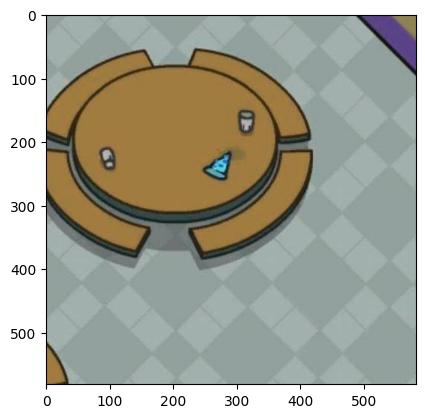

In [165]:
bg = random_square_background("bg")
bg = cv2.cvtColor(bg,cv2.color)
plt.imshow(bg)
plt.show()